In [18]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import torch
import numpy as np
from tool.model import Unet
from tool.evaluate import *

In [19]:
model = Unet().to('cuda')

In [20]:
inputs = torch.Tensor(np.load('inputs.npy')).to('cuda')
labels = np.load('outputs.npy')

In [21]:
inputs_test = torch.Tensor(np.load('inputs_test.npy')).to('cuda')
labels_test = np.load('outputs_test.npy')

In [22]:
checkpoint = torch.load('model_piunet_opt_b3_elr_many/model_17000.pt')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

Unet(
  (maxpool): MaxPool3d(kernel_size=(2, 2, 1), stride=(2, 2, 1), padding=0, dilation=1, ceil_mode=False)
  (encoder1): Sequential(
    (0): Conv3d(1, 32, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (1): ReLU()
    (2): Conv3d(32, 64, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (3): ReLU()
  )
  (encoder2): Sequential(
    (0): Conv3d(64, 64, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (1): ReLU()
    (2): Conv3d(64, 128, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (3): ReLU()
  )
  (encoder3): Sequential(
    (0): Conv3d(128, 128, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (1): ReLU()
    (2): Conv3d(128, 256, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (3): ReLU()
  )
  (encoder4): Sequential(
    (0): Conv3d(256, 256, kernel_size=(2, 2, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (1): ReLU()
    (2): Conv3d(256, 512, kernel_size=(3, 3, 1), stride=(1, 1, 1), p

In [23]:
idx = 0

In [24]:
b_norm = 2500

In [25]:
b = model(torch.permute(inputs[idx, ...], (3, 2, 1, 0))[None, ...])*b_norm
b = b.cpu().detach().numpy().squeeze().transpose(2, 1, 0, 3)

B = labels[idx, ...]*b_norm
B = B.transpose(1, 2, 3, 0)

In [26]:
b.shape, B.shape

((513, 257, 50, 3), (513, 257, 50, 3))

In [27]:
b_test = model(torch.permute(inputs_test[idx, ...], (3, 2, 1, 0))[None, ...])*b_norm
b_test = b_test.cpu().detach().numpy().squeeze().transpose(2, 1, 0, 3)

B_test = labels_test[idx, ...]*b_norm
B_test = B_test.transpose(1, 2, 3, 0)

In [28]:
# z=0을 50개 쌓아서 model magnetic field라고 놓았을 때
bb = np.tile(B[..., 0, :][:, :, None, :], (1, 1, 50, 1))
bb.shape

(513, 257, 50, 3)

{'c_vec': 0.59247726, 'c_cs': 0.19613248154974552, 'c_cs_ep': 0.19613248154974552, "E_n'": -1.298461675643921, "E_m'": -2.5517800987553185, "E_m'_ep": -2.5517800987553185, 'eps': 6.8893075}


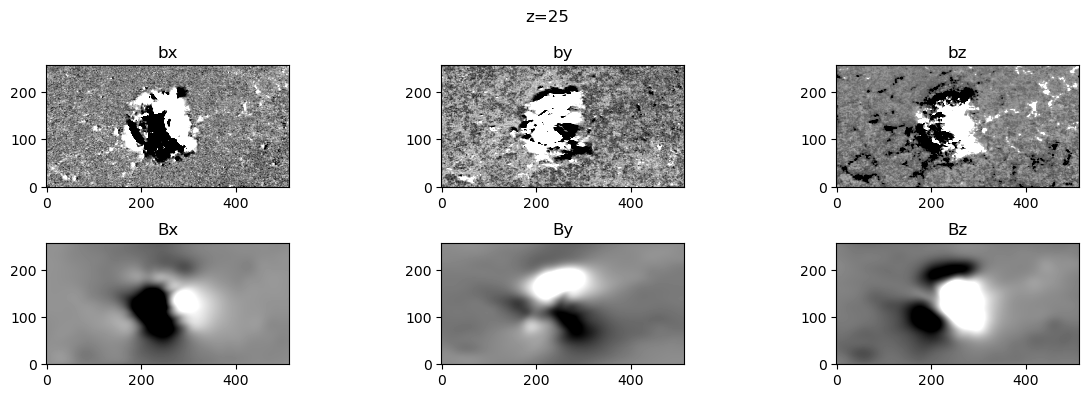

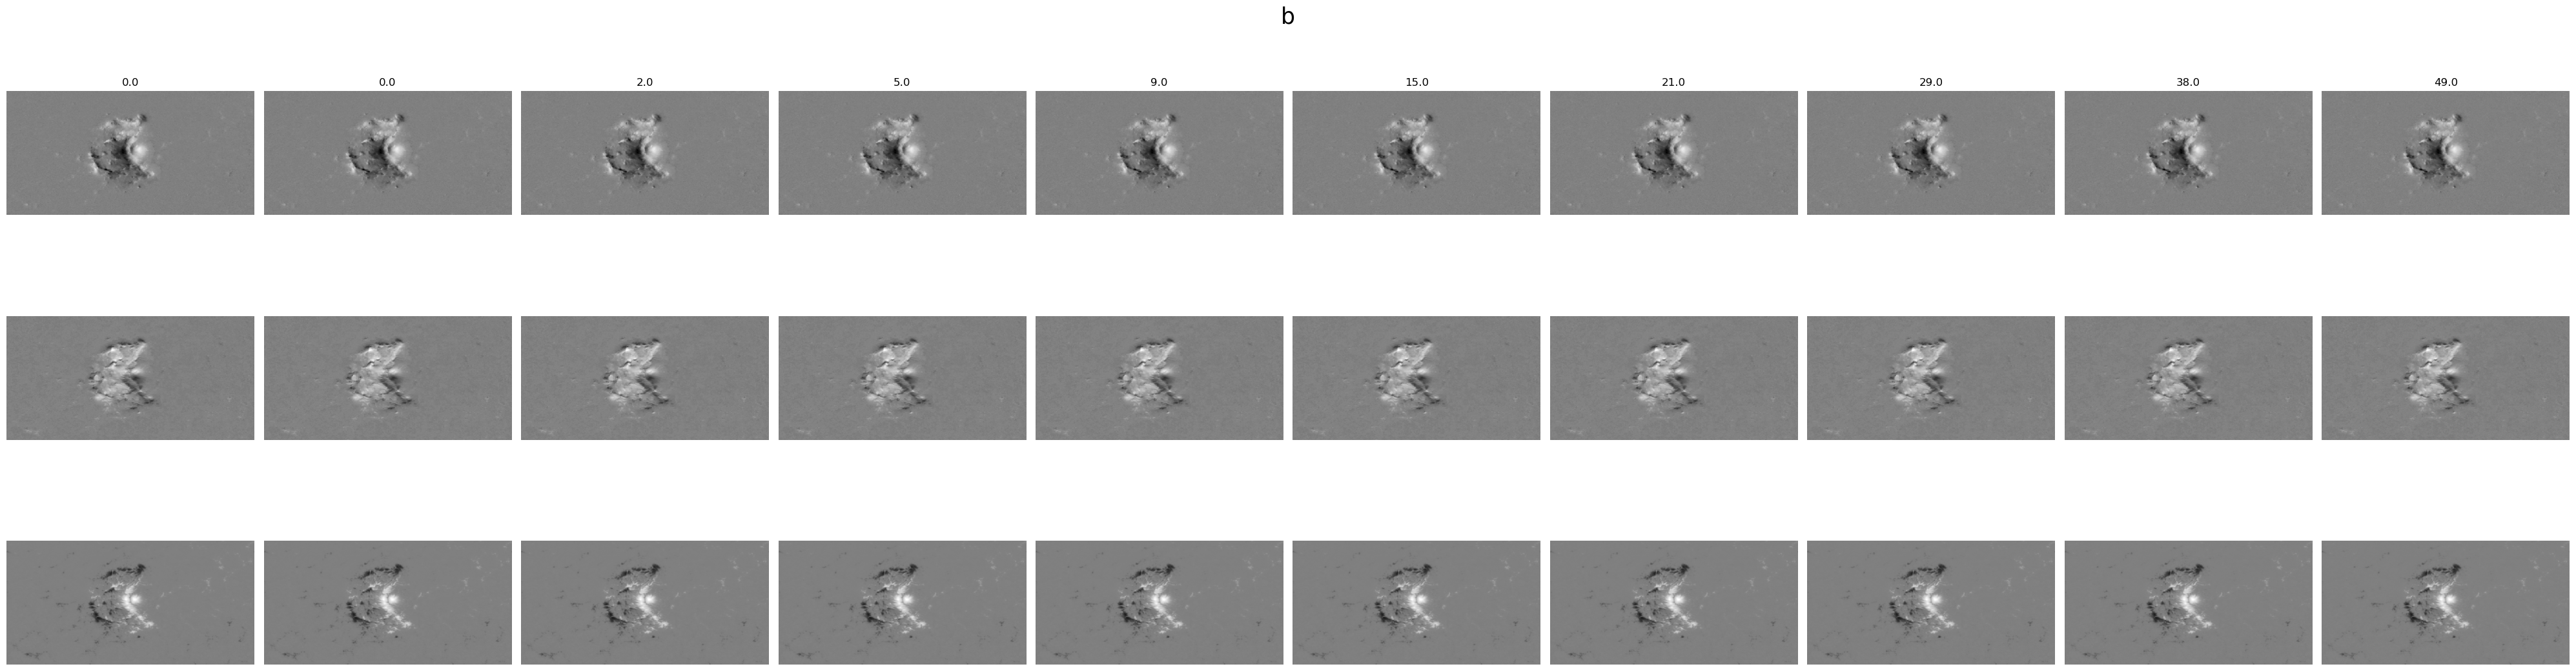

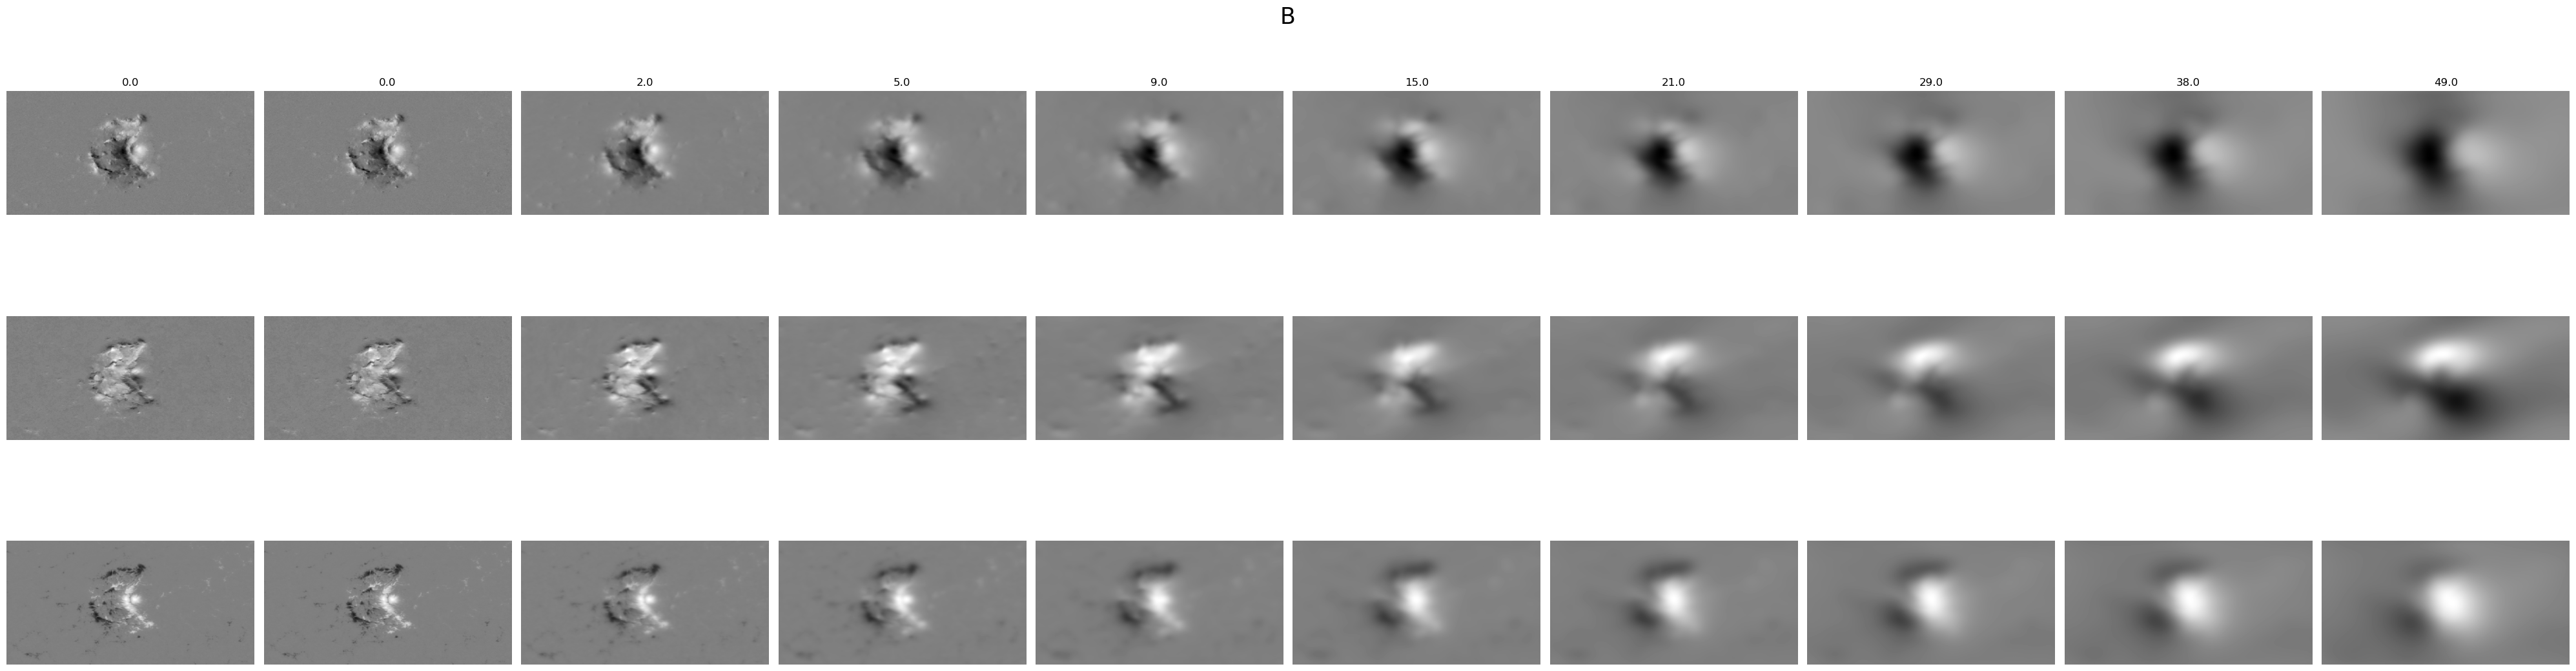

In [29]:
print(metric(bb, B))
plot_overview(bb, B, z=25, b_norm=100)
plot_sample(bb, B)

{'c_vec': 0.942001, 'c_cs': 9.897615461047776, 'c_cs_ep': 0.3135722195675093, "E_n'": 0.4195016622543335, "E_m'": -0.24720504243748143, "E_m'_ep": -738287.4583703097, 'eps': 1.0336324}


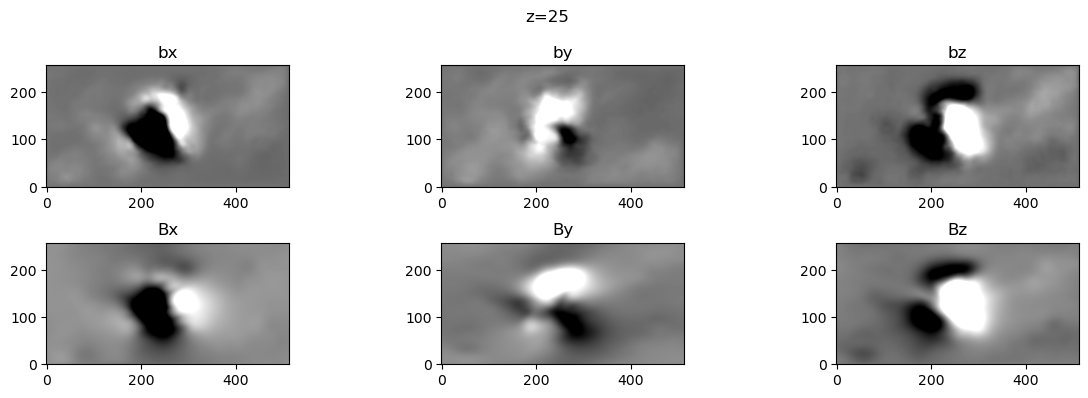

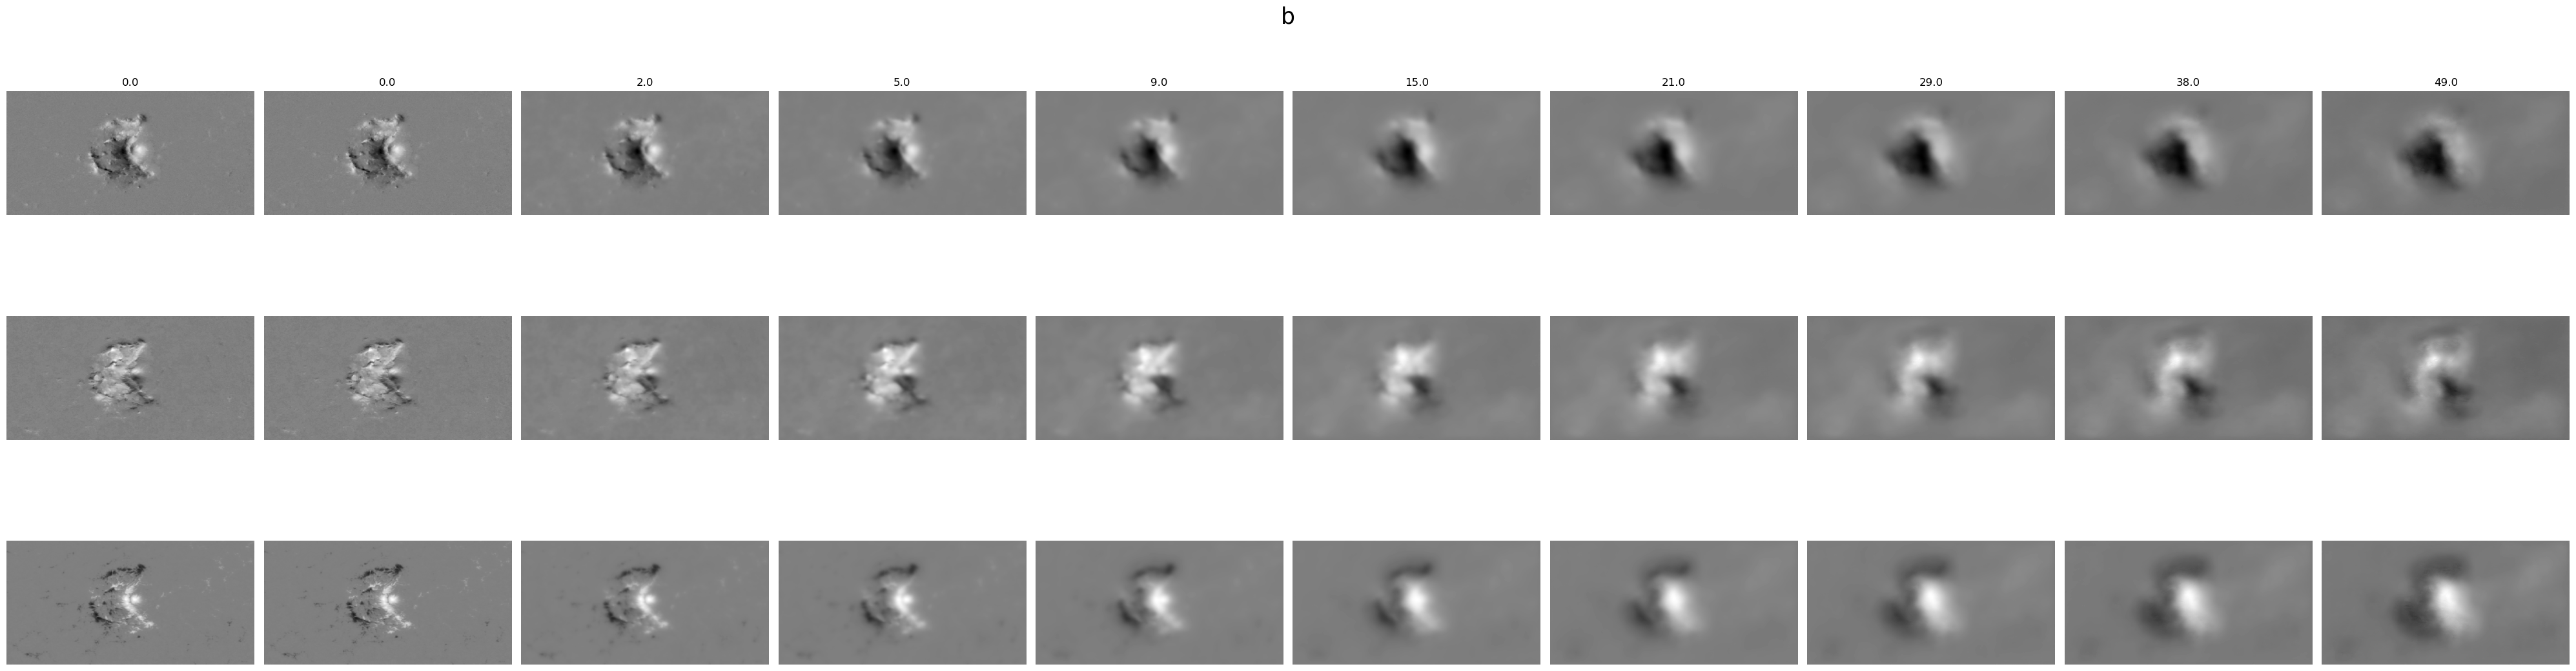

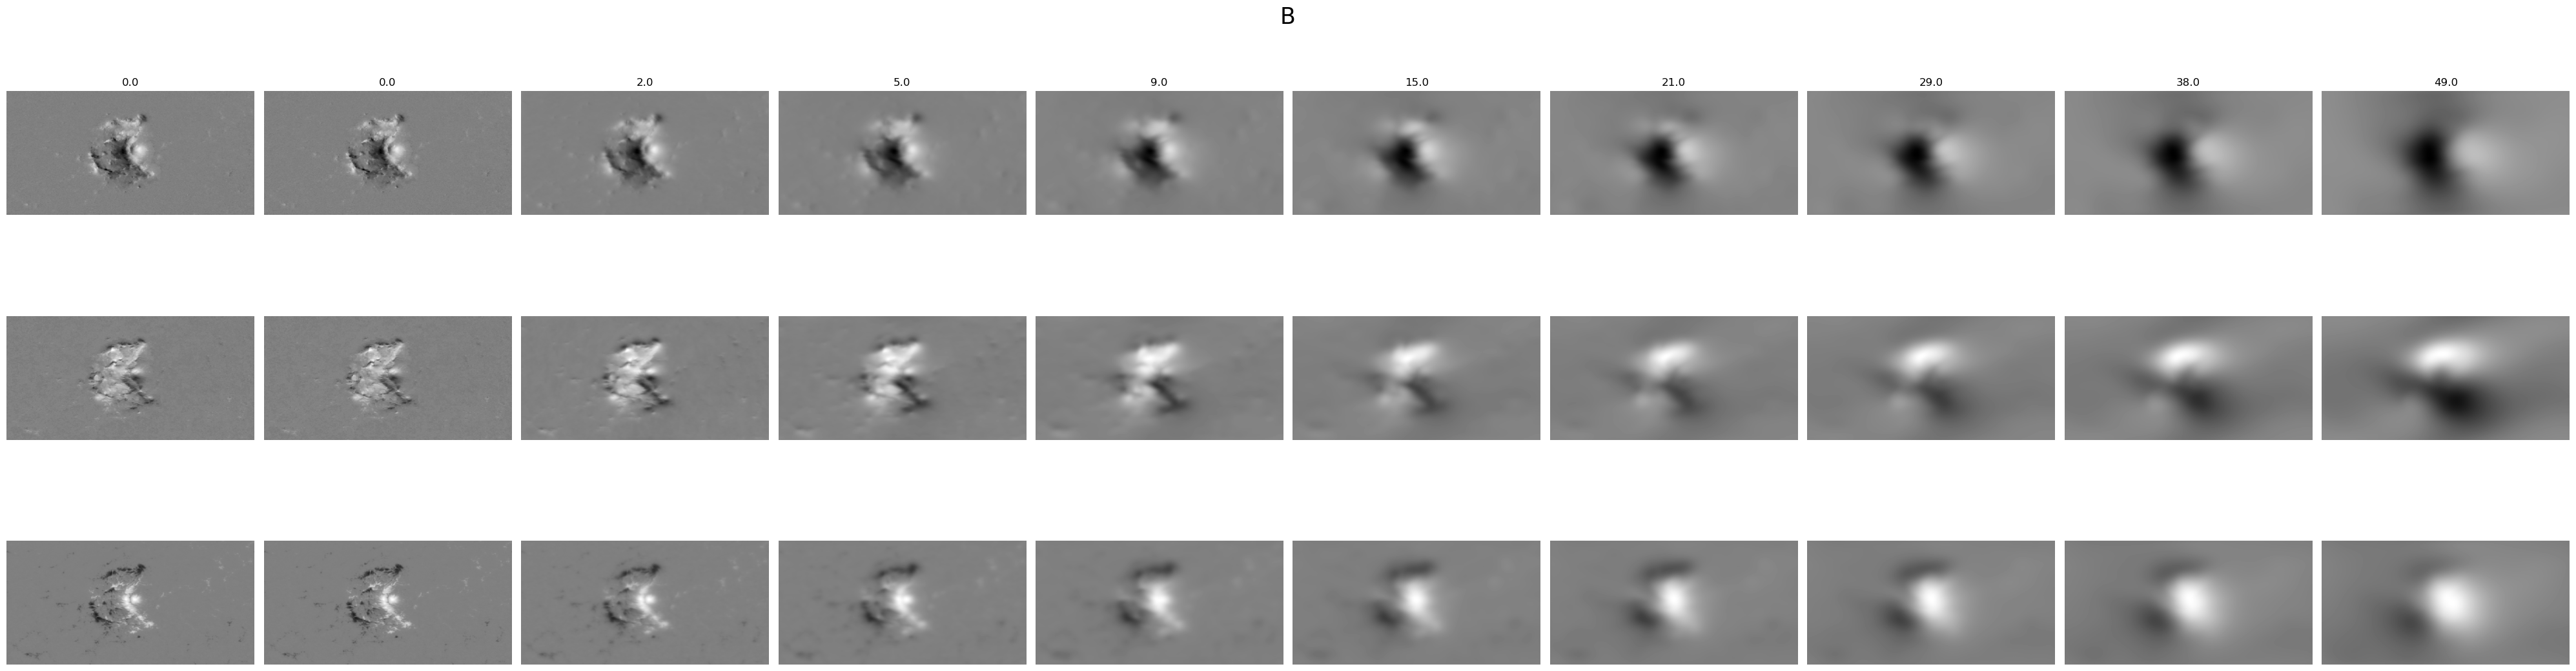

In [30]:
print(metric(b, B))
plot_overview(b, B, z=25, b_norm=100)
plot_sample(b, B)

{'c_vec': 0.92342705, 'c_cs': 3.299344210071222, 'c_cs_ep': 0.09108001304601754, "E_n'": 0.3267110586166382, "E_m'": -0.5055677672347751, "E_m'_ep": -742376.9055656435, 'eps': 0.98110384}


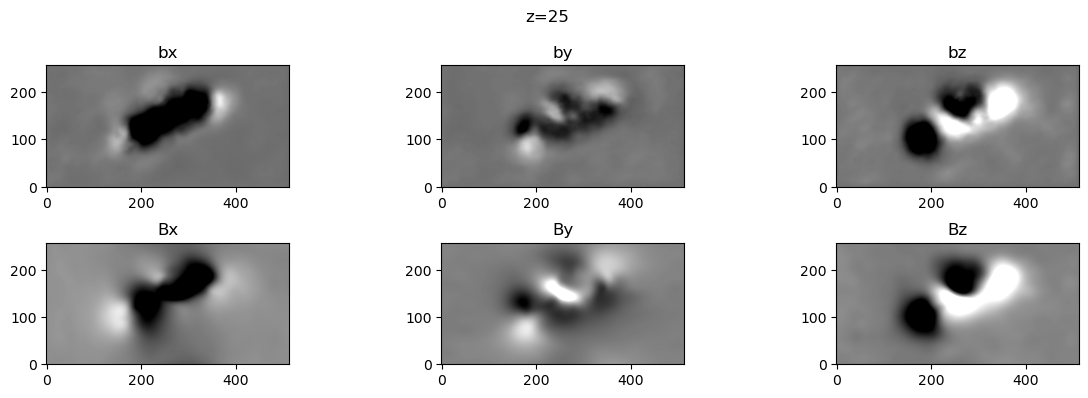

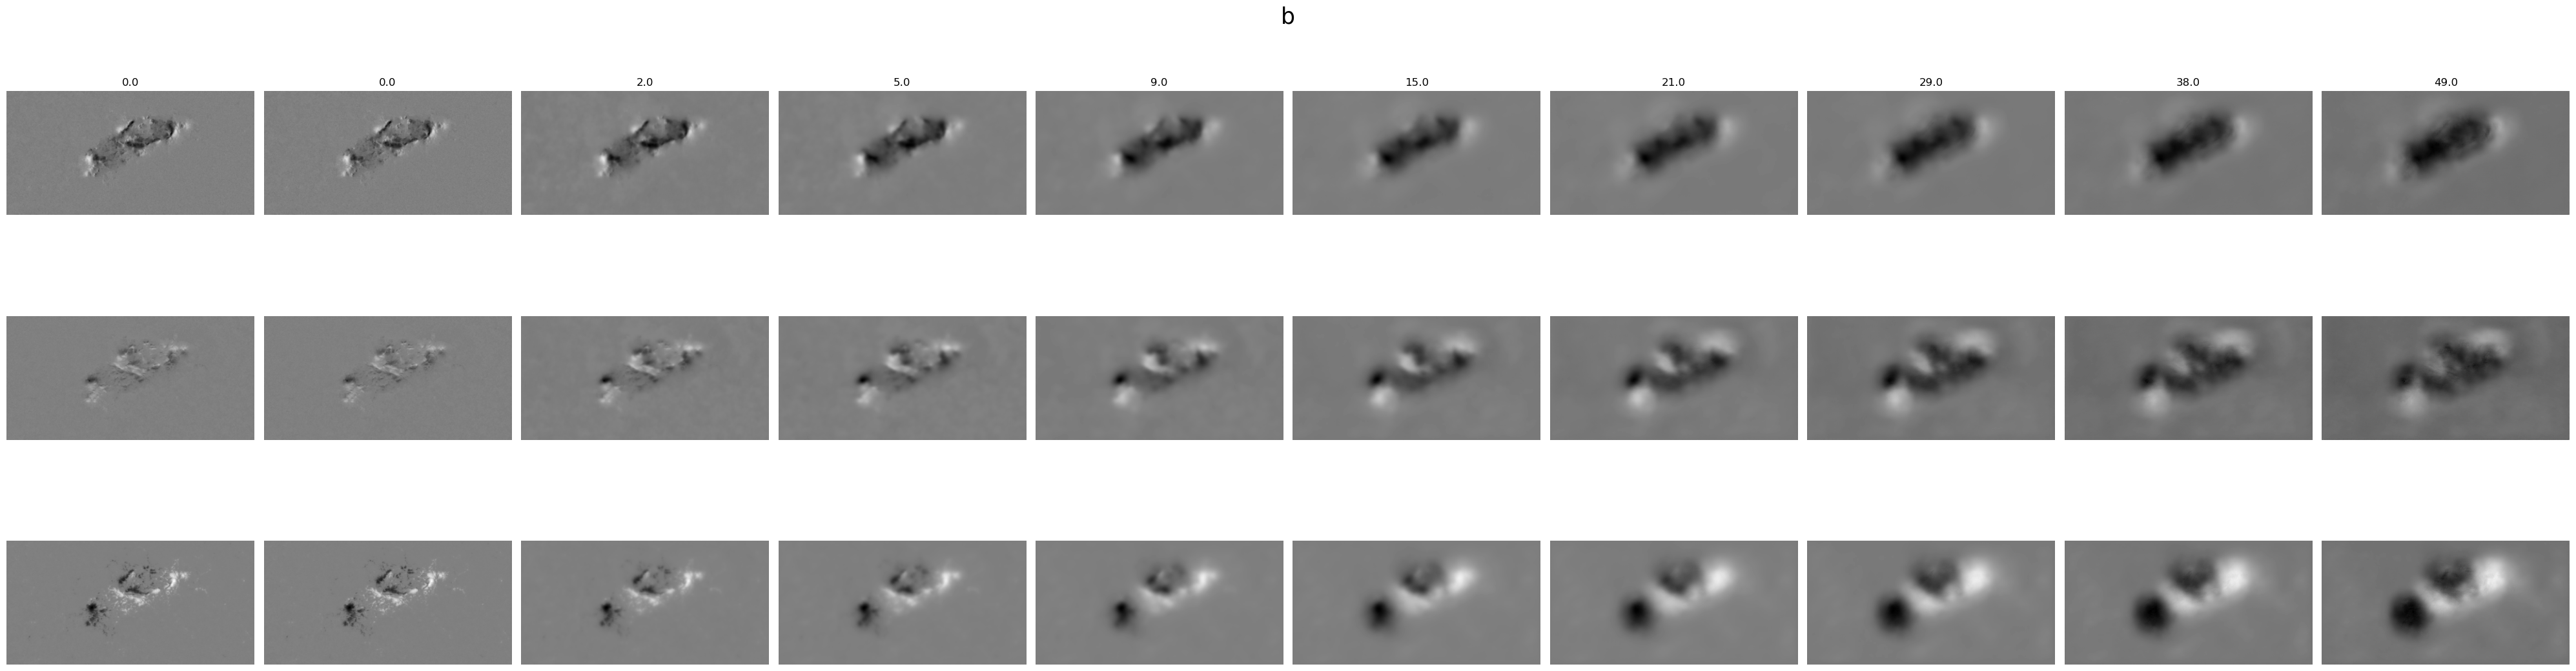

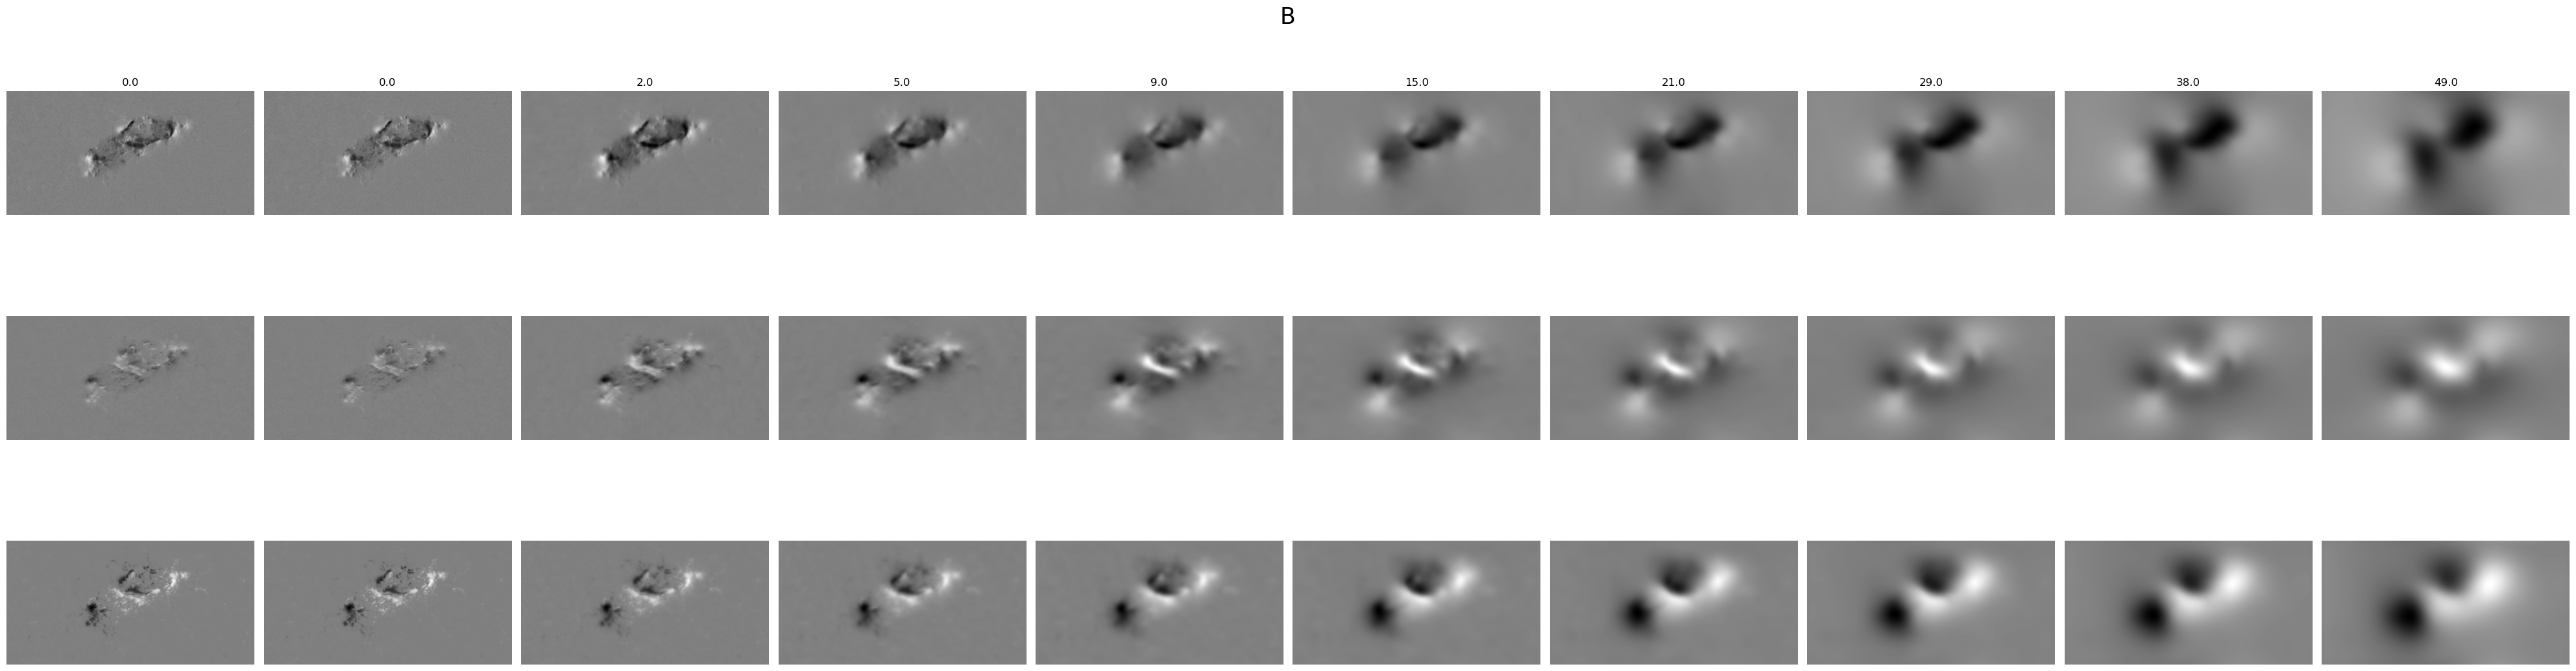

In [31]:
print(metric(b_test, B_test))
plot_overview(b_test, B_test, z=25, b_norm=100)
plot_sample(b_test, B_test)

In [32]:
inputs_tes = torch.Tensor(np.load('12673_20170906_083600_input.npy')).to('cuda')
labels_tes = np.load('12673_20170906_083600_output.npy')

In [33]:
b_tes = model(torch.permute(inputs_tes, (3, 2, 1, 0))[None, ...])*b_norm
b_tes = b_tes.cpu().detach().numpy().squeeze().transpose(2, 1, 0, 3)

B_tes = labels_tes*b_norm
B_tes = B_tes.transpose(1, 2, 3, 0)

{'c_vec': 0.9188454647684252, 'c_cs': 1.041134959350401e+42, 'c_cs_ep': 0.453068040763323, "E_n'": 0.4594519148174606, "E_m'": 0.07408501043113913, "E_m'_ep": -725341.1033345415, 'eps': 0.8017767324429825}


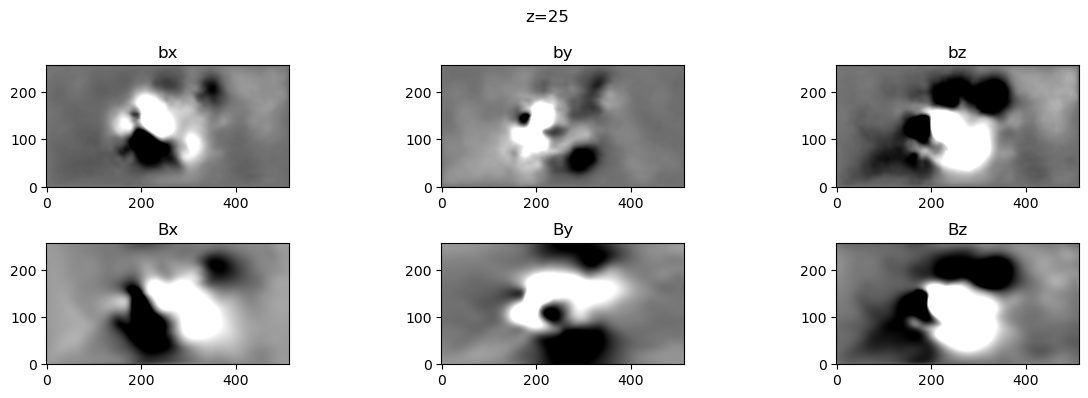

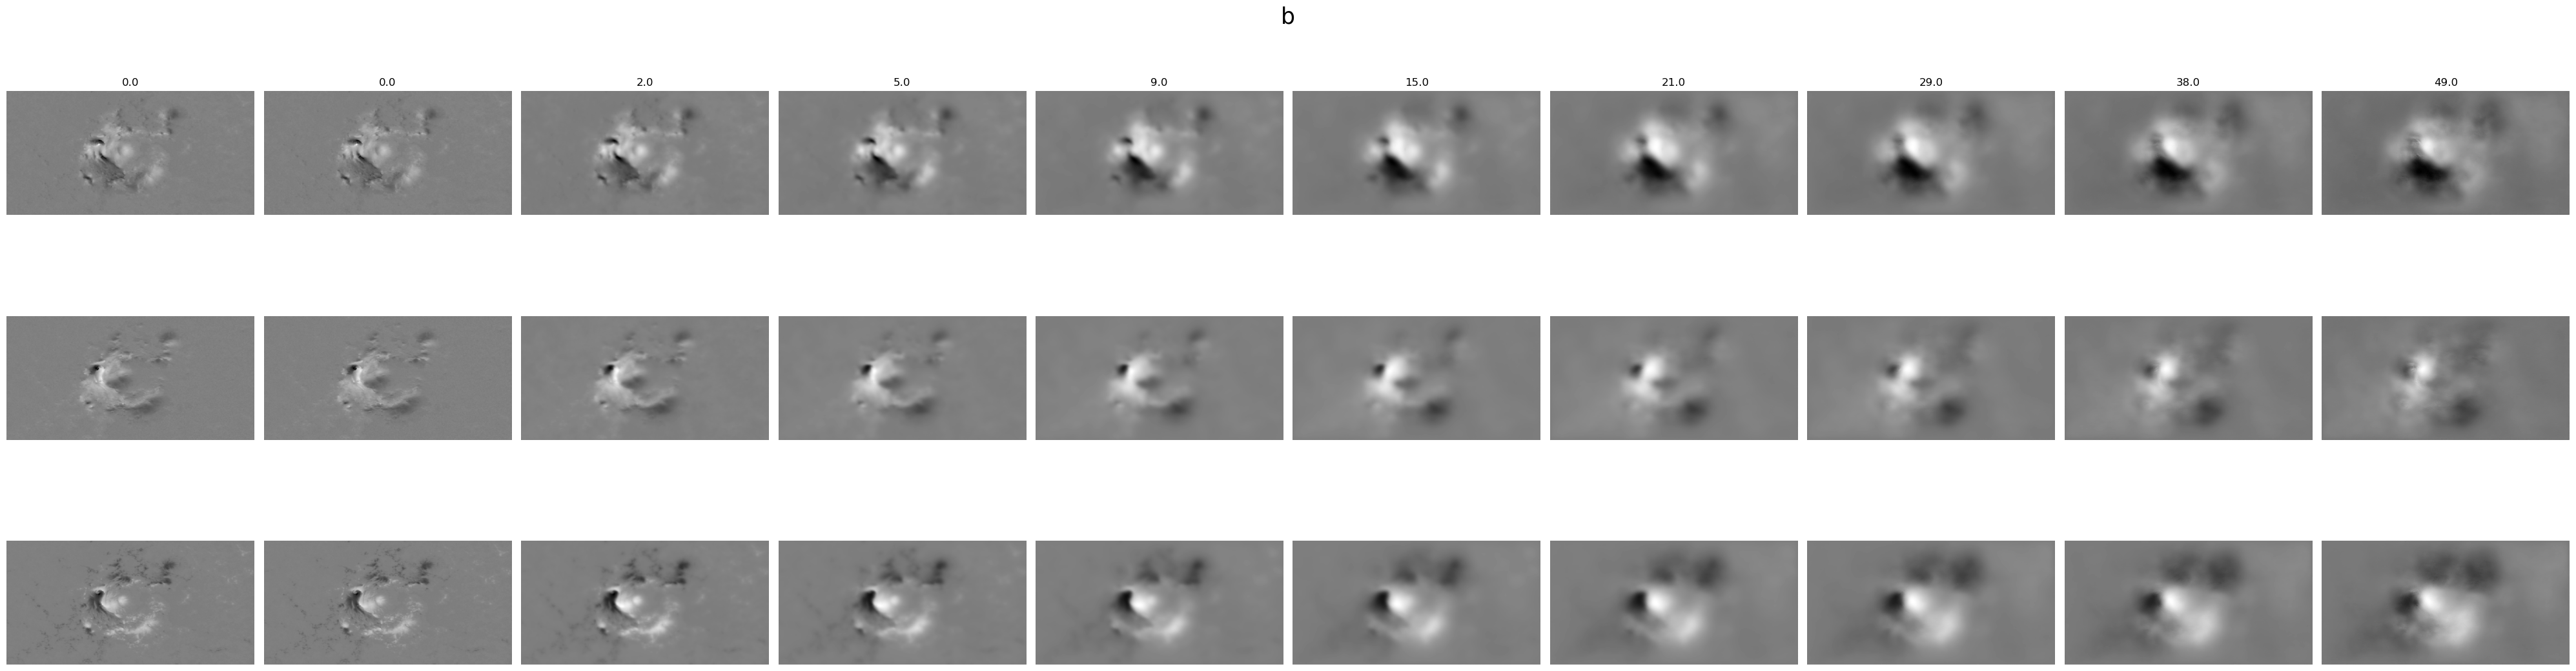

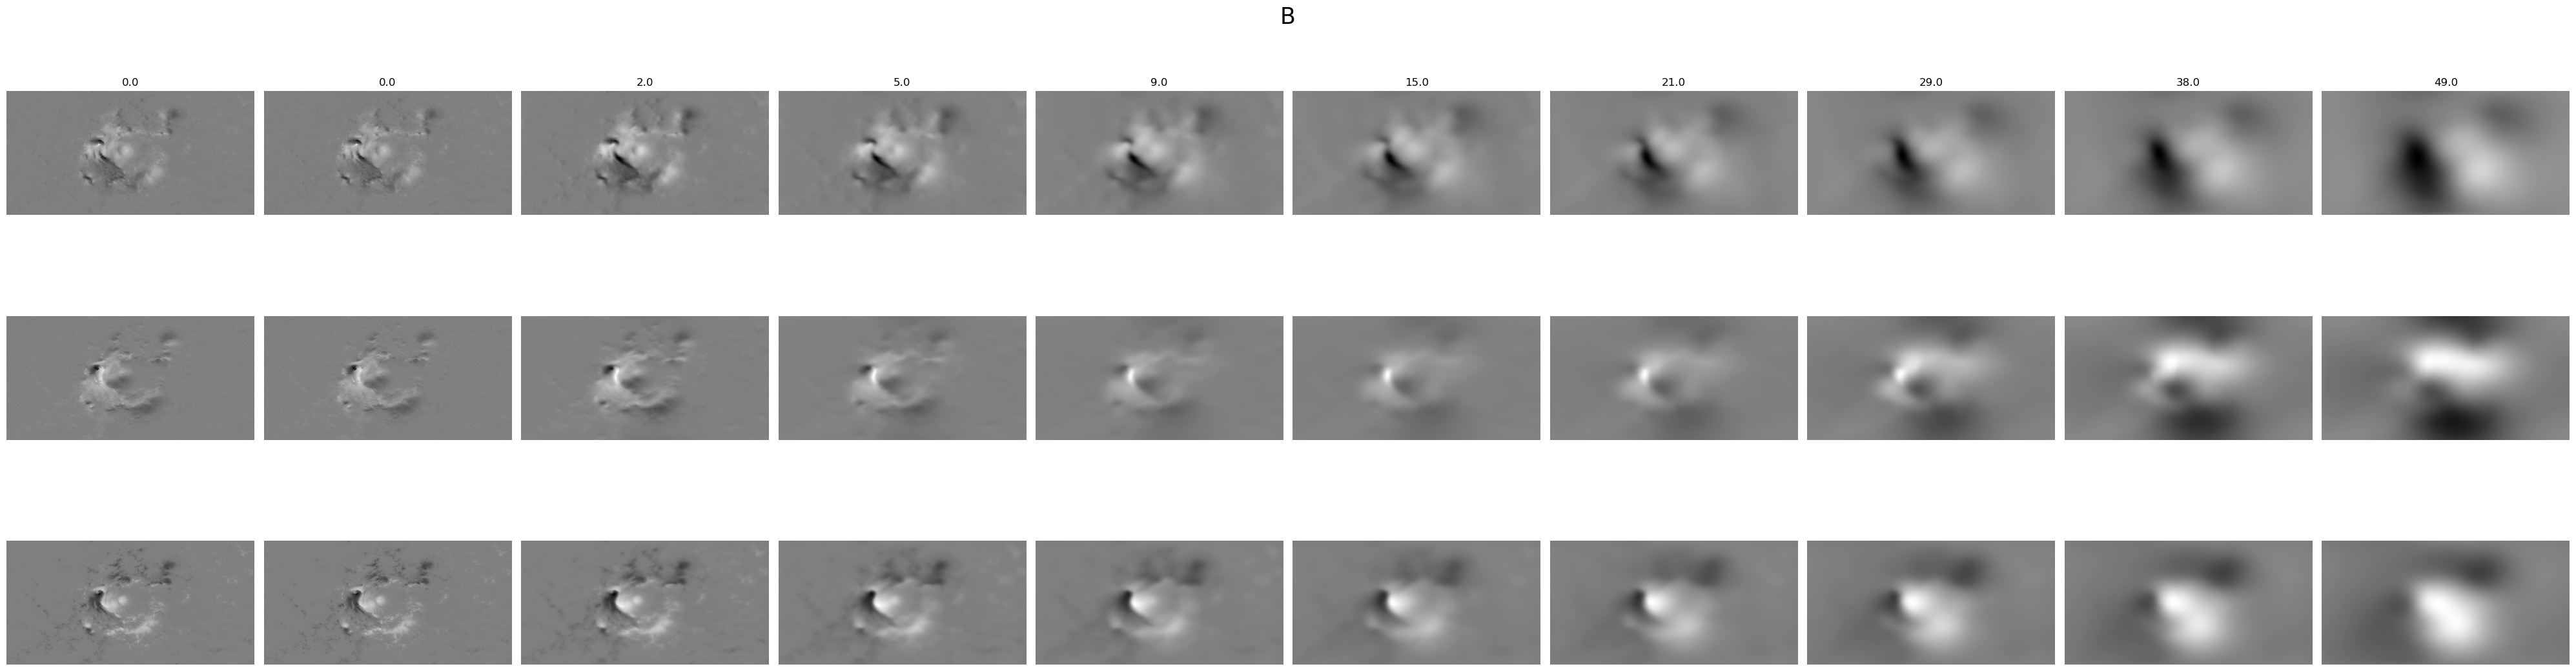

In [34]:
print(metric(b_tes, B_tes))
plot_overview(b_tes, B_tes, z=25, b_norm=100)
plot_sample(b_tes, B_tes)